Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

In [2]:
!pip install -q opendatasets

In [41]:
import opendatasets as od
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khossain88
Your Kaggle Key: ··········


100%|██████████| 211k/211k [00:00<00:00, 75.3MB/s]

In [33]:
df = pd.read_csv("/content/sms-spam-collection-dataset/spam.csv", encoding="latin-1")

#Data cleanup: getting rid of extraneous column(they have no data in them) and renaming columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1) # remove the blank columns in the dataset
df = df.rename(columns={"v1" :"label", "v2" : "SMS text data"})  # rename the columns to better match the dataset
df = df.replace("ham", "not spam")


In [7]:
df.shape

(5572, 2)

In [42]:
df['label'].value_counts()*100/df.shape[0]

not spam    86.593683
spam        13.406317
Name: label, dtype: float64

In [43]:
df['label'].value_counts()

not spam    4825
spam         747
Name: label, dtype: int64

In [34]:
#print(len(dataset))
df.head()

,label,SMS text data
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('SMS text data').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SMS text data'].value_counts()
    for x_label, grp in _df_2.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('SMS text data')

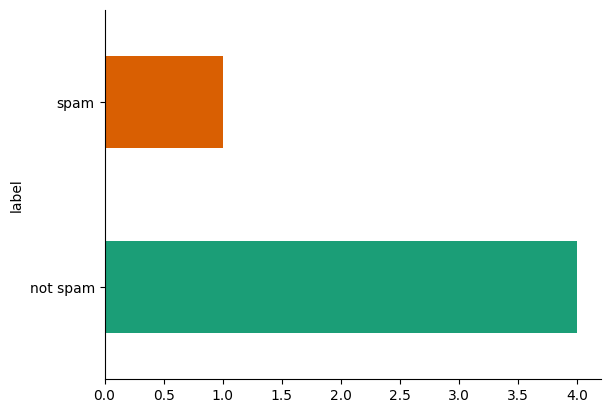

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5572 non-null   object
 1   SMS text data  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
display(df)   #display the dataset

,label,SMS text data
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,not spam,Will Ì_ b going to esplanade fr home?
5569,not spam,"Pity, * was in mood for that. So...any other s..."
5570,not spam,The guy did some bitching but I acted like i'd...


In [64]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Data pre-processing
df["SMS text data"] = df["SMS text data"].str.lower()   # lowercasing

#remove punctuation (note: website links dont display properly )
#punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
df["SMS text data"]=df["SMS text data"].str.replace('[^\w\s]','')

#Tokenize the sms data
#df["SMS text data"]=df["SMS text data"].apply(str)
df["SMS text data"] = df["SMS text data"].apply(word_tokenize)

#Remove stopwords
stop_words = set(stopwords.words("english"))
df["SMS text data"] = df["SMS text data"].apply(lambda x: [word for word in x if word not in stop_words])
df["SMS text data"] = df["SMS text data"].apply(lambda x: " ".join(x))


# Stemming



<ipython-input-68-c7c4497652f9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["SMS text data"]=df["SMS text data"].str.replace('[^\w\s]','')


In [69]:
display(df)

,label,SMS text data
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,not spam,u dun say early hor u c already say
4,not spam,nah nt think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u å750 pound prize ...
5568,not spam,ì_ b going esplanade fr home
5569,not spam,pity mood suggestions
5570,not spam,guy bitching acted like interested buying some...


In [67]:
display(df)

,label,SMS text data
0,not spam,"go jurong point , crazy .. available bugis n g..."
1,not spam,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,not spam,u dun say early hor ... u c already say ...
4,not spam,"nah n't think goes usf , lives around though"
...,...,...
5567,spam,2nd time tried 2 contact u. u å£750 pound priz...
5568,not spam,ì_ b going esplanade fr home ?
5569,not spam,"pity , * mood . ... suggestions ?"
5570,not spam,guy bitching acted like 'd interested buying s...


In [78]:
display(df["SMS text data"])

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4               nah nt think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: SMS text data, Length: 5572, dtype: object

In [79]:
#Bag of words using COunt Vectorizer
vec = CountVectorizer()
data = vec.fit_transform(df["SMS text data"])
bow = pd.DataFrame(data.toarray(), columns=vec.get_feature_names_out())
bow

,008704050406,0089,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,ì_,ìä,ìï,öó_,û_,û_thanks,ûud,ûï,ûïharry,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#Method2: CountVectorizer for BOW
bow = CountVectorizer(stop_words="english")
bow.fit(df["SMS text data"])   #fitting the data


CountVectorizer(stop_words='english')

In [71]:
bow.get_feature_names_out()

array(['008704050406', '0089', '0121', ..., 'ûï', 'ûïharry', 'ûò'],
      dtype=object)

In [72]:
bow_features = bow.transform(df["SMS text data"])
bow_features

<5572x8796 sparse matrix of type '<class 'numpy.int64'>'
	with 41976 stored elements in Compressed Sparse Row format>

In [73]:
bow_feature_array =bow_features.toarray()
bow_feature_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
print(bow.get_feature_names_out())
for sentence, feature  in zip(df["SMS text data"],bow_feature_array):
  print(sentence)
  print(feature)

Streaming output truncated to the last 5000 lines.
somebody go andros steal ice
[0 0 0 ... 0 0 0]
know didt msg recently
[0 0 0 ... 0 0 0]
take us shopping mark distract isaiahd
[0 0 0 ... 0 0 0]
mum hope great day hoping text meets well full life great day abiola
[0 0 0 ... 0 0 0]
sense foot penis
[0 0 0 ... 0 0 0]
okay thought expert
[0 0 0 ... 0 0 0]
deep sigh miss really surprised nt gone net cafe yet get nt miss
[0 0 0 ... 0 0 0]
ss thinl role like sachinjust standing others hit
[0 0 0 ... 0 0 0]
great trip india bring light everyone project everyone lucky see smile bye abiola
[0 0 0 ... 0 0 0]
importantly discuss u
[0 0 0 ... 0 0 0]
k k training process
[0 0 0 ... 0 0 0]
ok lor ned 2 go toa payoh 4 2 return smth u wan 2 send wat
[0 0 0 ... 0 0 0]
da car park
[0 0 0 ... 0 0 0]
wish holding tightly making see important much mean much need life
[0 0 0 ... 0 0 0]
asked anthony dad bf
[0 0 0 ... 0 0 0]
wnevr wana fal luv vth books bed fals luv vth yen madodu nav pretsorginta nammanna 

In [80]:
# Keras implementaiton of BOW
import keras
from keras.preprocessing.text import Tokenizer
data= df["SMS text data"]
print(data)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4               nah nt think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: SMS text data, Length: 5572, dtype: object


In [83]:
#Method 4: BOW imlementaiton with Keras (2ND way)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["SMS text data"])  #fit the data on the tokenizer


In [84]:
print(f'Vocabulary:{list(tokenizer.word_index.keys())}')

Vocabulary:['u', 'call', '2', 'get', 'ur', 'nt', 'gt', 'lt', '4', 'ok', 'go', 'free', 'know', 'got', 'like', 'good', 'come', 'time', 'day', 'love', 'want', 'send', 'text', 'one', 'going', 'txt', 'need', 'home', 'lor', 'r', 'sorry', 'see', 'still', 'back', 'today', 'stop', 'da', 'n', 'reply', 'dont', 'mobile', 'tell', 'hi', 'new', 'later', 'take', 'think', 'please', 'pls', 'phone', 'k', 'ì', 'week', 'dear', 'well', 'great', 'oh', 'much', 'night', 'claim', 'c', 'hey', 'hope', 'wat', 'happy', 'na', 'way', 'make', 'work', 'give', 'yes', 'number', 'message', 'wan', 'prize', 'right', 'say', 'already', '1', 'tomorrow', 'ask', 'said', 'yeah', 'really', 'amp', 'msg', 'e', 'im', 'would', 'meet', '3', 'life', 'let', 'babe', 'last', 'morning', 'miss', 'thanks', 'cos', 'cash', 'lol', 'anything', 'find', 'every', 'win', 'sure', 'pick', 'also', 'sent', 'ill', 'something', 'keep', 'care', 'nokia', 'contact', 'b', 'urgent', 'cant', 'could', 'buy', 'wait', 'us', 'first', 'even', 'next', 'feel', 'someone

In [85]:
tokenizer.word_counts

OrderedDict([('go', 279),
             ('jurong', 1),
             ('point', 13),
             ('crazy', 15),
             ('available', 17),
             ('bugis', 7),
             ('n', 148),
             ('great', 114),
             ('world', 38),
             ('la', 7),
             ('e', 84),
             ('buffet', 2),
             ('cine', 7),
             ('got', 251),
             ('amore', 1),
             ('wat', 107),
             ('ok', 284),
             ('lar', 38),
             ('joking', 6),
             ('wif', 27),
             ('u', 1163),
             ('oni', 4),
             ('free', 278),
             ('entry', 26),
             ('2', 485),
             ('wkly', 14),
             ('comp', 11),
             ('win', 71),
             ('fa', 4),
             ('cup', 8),
             ('final', 18),
             ('tkts', 4),
             ('21st', 3),
             ('may', 49),
             ('2005', 3),
             ('text', 189),
             ('87121', 4),
            

In [86]:
#Printing the word Vectors
vectors = tokenizer.texts_to_matrix(df["SMS text data"], mode= 'count')
print(vectors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]



References:
https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
https://medium.com/@oluyaled/email-spam-detection-using-machine-learning-scikit-python-1b15ee1c6f75
https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
https://www.nltk.org/api/nltk.tokenize.html
https://www.educba.com/nltk-remove-punctuation/
https://www.youtube.com/watch?v=dh9XcKQq3OM
https://www.geeksforgeeks.org/python-stemming-words-with-nltk/